# <font color='#3d59c6'> MD004 EJEMPLO BABIES: COVARIANZA & ANOVA </font>

## <font color='#3d59c6'> PARTE I: MATRIZ COVARIANZA Y CORRELACIÓN </font>

In [1]:
babies<-read.csv("babies.csv", header=TRUE, sep = ";")
head(babies)

,bwt,gestation,parity,age,height,weight,smoke
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,120,284,0,27,62,100,0
2,113,282,0,33,64,135,0
3,128,279,0,28,64,115,1
4,123,999,0,36,69,190,0
5,108,282,0,23,67,125,1
6,136,286,0,25,62,93,0


In [2]:
babies4cov<-subset(babies, select=-c(parity,smoke))
head(babies4cov)

,bwt,gestation,age,height,weight
,<int>,<int>,<int>,<int>,<int>
1,120,284,27,62,100
2,113,282,33,64,135
3,128,279,28,64,115
4,123,999,36,69,190
5,108,282,23,67,125
6,136,286,25,62,93


In [3]:
cov(babies4cov)

,bwt,gestation,age,height,weight
bwt,332.568177,85.667014,3.419612,12.04483,126.10747
gestation,85.667014,5648.555049,-1.584344,26.08937,549.66666
age,3.419612,-1.584344,41.692750,1.64819,59.89698
height,12.044825,26.089368,1.648190,27.67880,467.56067
weight,126.107473,549.666660,59.896979,467.56067,21866.28366


In [4]:
cor(babies4cov)

,bwt,gestation,age,height,weight
bwt,1.00000000,0.062503538,0.029040643,0.12554127,0.04676414
gestation,0.06250354,1.000000000,-0.003264755,0.06598135,0.04945876
age,0.02904064,-0.003264755,1.000000000,0.04851805,0.06273172
height,0.12554127,0.065981354,0.048518050,1.00000000,0.60100328
weight,0.04676414,0.049458760,0.062731715,0.60100328,1.00000000


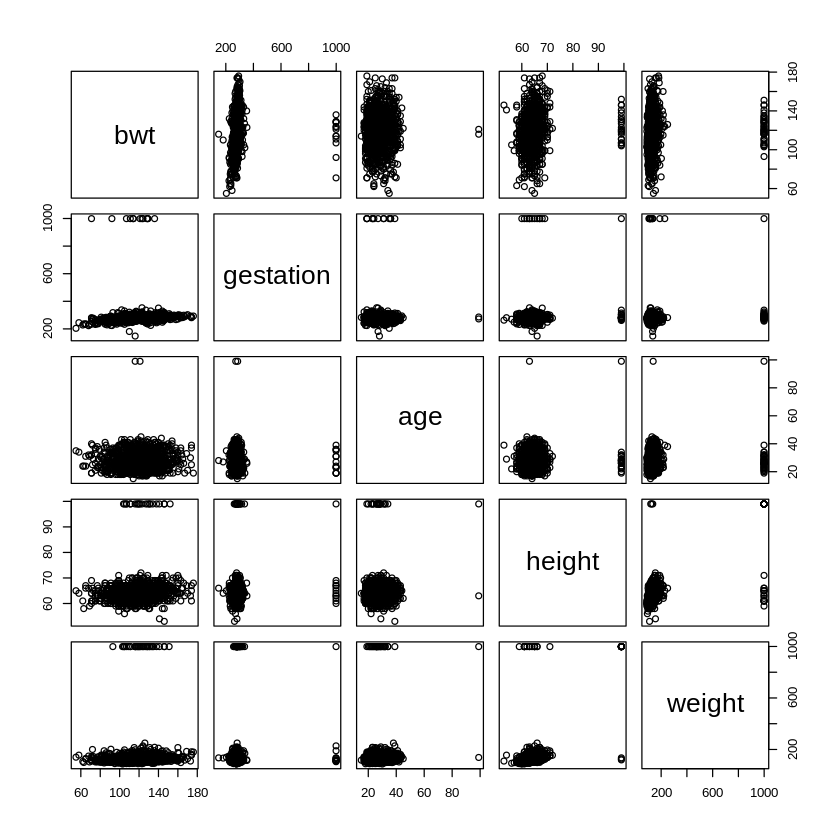

In [5]:
pairs(babies4cov)

,bwt,gestation,age,height,weight
,<int>,<int>,<int>,<int>,<int>
1,120,284,27,62,100
2,113,282,33,64,135
3,128,279,28,64,115
5,108,282,23,67,125
6,136,286,25,62,93
7,138,244,33,62,178


,bwt,gestation,age,height,weight
bwt,337.159204,120.379444,3.32411585,9.32802826,59.401573
gestation,120.379444,255.260549,-4.71144351,2.76848470,7.397214
age,3.324116,-4.711444,33.74935959,-0.07472913,17.830763
height,9.328028,2.768485,-0.07472913,6.38364942,22.924155
weight,59.401573,7.397214,17.83076266,22.92415498,432.436451


,bwt,gestation,age,height,weight
bwt,1.00000000,0.41033917,0.031162039,0.201065626,0.15556765
gestation,0.41033917,1.00000000,-0.050760907,0.068582887,0.02226461
age,0.03116204,-0.05076091,1.000000000,-0.005091229,0.14759648
height,0.20106563,0.06858289,-0.005091229,1.000000000,0.43631252
weight,0.15556765,0.02226461,0.147596481,0.436312519,1.00000000


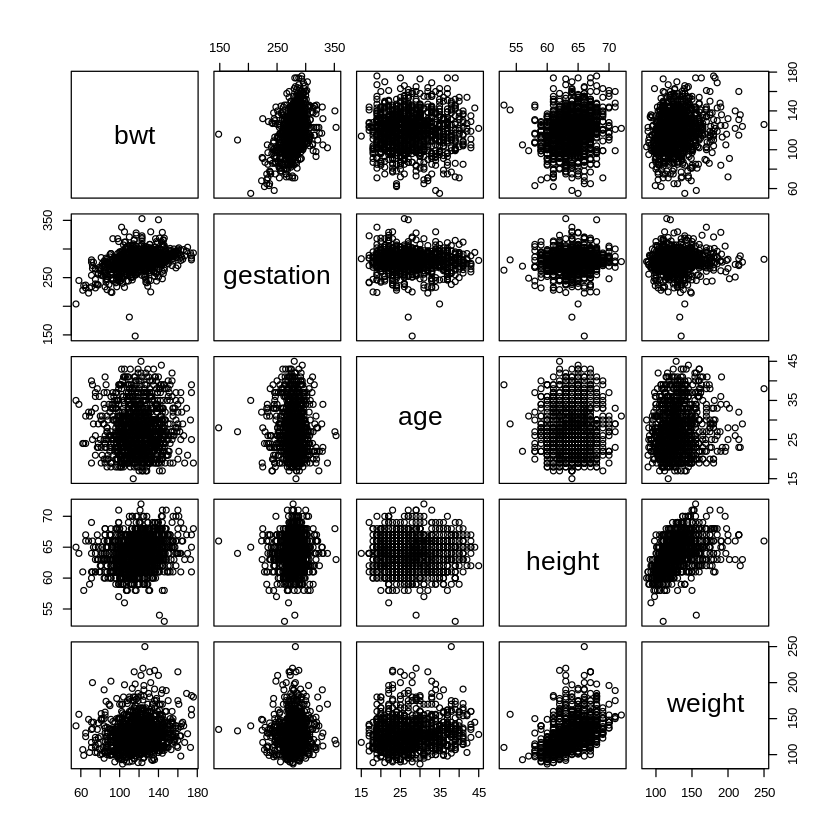

In [6]:
babies4covclean<-babies4cov[(babies4cov$weight<999 & babies4cov$gestation<999 & babies4cov$height<99 & babies4cov$age< 99), ]
head(babies4covclean)
cov(babies4covclean)
cor(babies4covclean)
pairs(babies4covclean)

## <font color='#3d59c6'> PARTE II: ANOVA </font>

In [8]:
babies<-babies[(babies$weight<999 & babies$gestation<999 & babies$height<99 & babies$age< 99), ]

In [9]:
smoking<-babies[babies$smoke==1,]
nonsmoking<-babies[babies$smoke==0,]
head(smoking)
head(nonsmoking)

,bwt,gestation,parity,age,height,weight,smoke
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,128,279,0,28,64,115,1
5,108,282,0,23,67,125,1
10,143,299,0,30,66,136,1
12,144,282,0,32,64,124,1
13,141,279,0,23,63,128,1
14,110,281,0,36,61,99,1


,bwt,gestation,parity,age,height,weight,smoke
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,120,284,0,27,62,100,0
2,113,282,0,33,64,135,0
6,136,286,0,25,62,93,0
7,138,244,0,33,62,178,0
8,132,245,0,23,65,140,0
9,120,289,0,25,62,125,0


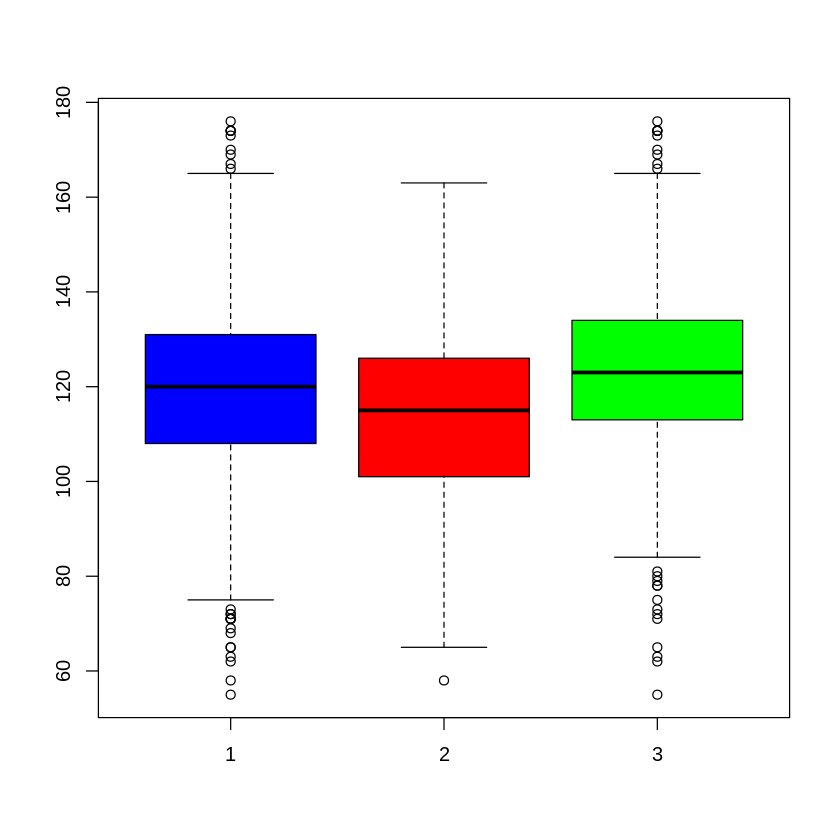

In [10]:
boxplot(babies$bwt, smoking$bwt, nonsmoking$bwt, col=c("blue","red","green"))

In [11]:
summary(babies$bwt)
summary(smoking$bwt)
summary(nonsmoking$bwt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   55.0   108.0   120.0   119.5   131.0   176.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   58.0   101.0   115.0   113.8   126.0   163.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   55.0   113.0   123.0   123.1   134.0   176.0 

In [12]:
fit<-aov(bwt ~ smoke, data=babies)
summary(fit)

              Df Sum Sq Mean Sq F value   Pr(>F)    
smoke          1   3835    3835   11.48 0.000728 ***
Residuals   1182 395024     334                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1